# Bir Tv-Radyo-Gazeteye Göre Yatırım Analizi Yapıyoruz.

### Gerekli Paketleri import Ediyoruz 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',55)
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

### import data

In [3]:
df=pd.read_csv('advertising.csv')

### EDA - Exploratory Data Analysis - Keşifsel Veri Analizi

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
df.shape

(200, 4)

<Axes: >

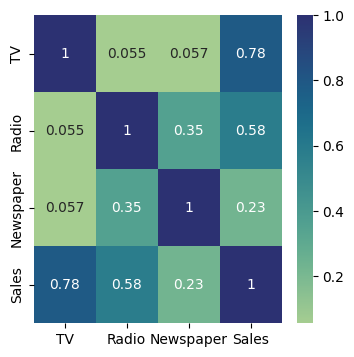

In [11]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')

In [12]:
abs(df.corr(numeric_only=True)['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

### Modelling

In [13]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [40]:
def algo_test(x, y):
    # Modelleri tanımlıyorum
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree', 'Gradient Boosting',
                  'KNeighborsRegressor', 'AdaBoost', 'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []
    predictions = {}

    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for name, algo in zip(algo_names, algos):
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p)**0.5)
        mae.append(mean_absolute_error(y_test, p))
        predictions[name] = p  # Tahminleri kaydediyoruz

    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae

    # Sonuçları 4 ondalık basamak ile biçimlendir
    result = result.applymap(lambda x: f"{x:.4f}")

    # Sonuçları döndürürken en iyi modeli seçiyoruz
    best_model = result['R_Squared'].astype(float).idxmax()
    best_predictions = predictions[best_model]
    
    return result.sort_values('R_Squared', ascending=False), best_predictions, y_test

# Algoritmaları çalıştırıp en iyi tahminleri alalım
result_table, best_predictions, y_test = algo_test(x, y)


In [41]:
algo_test(x,y)

(                                           R_Squared                 RMSE  \
 Gradient Boosting                             0.9836               0.7197   
 XGBRegressor                                  0.9725               0.9322   
 KNeighborsRegressor                           0.9709               0.9578   
 Extra Tree                                    0.9459               1.3072   
 Decision Tree                                 0.9316               1.4693   
 AdaBoost                                      0.9106               1.6796   
 Lasso                                         0.9004               1.7730   
 ElasticNet                                    0.9000               1.7770   
 Linear                                        0.8994               1.7816   
 Ridge                                         0.8994               1.7816   
 SVR                                           0.8731               2.0015   
 MLP Regressor                                 0.0977           

### Veri Görselleştirme

In [42]:
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'XGBRegressor', 'KNeighborsRegressor', 'Extra Tree', 'Decision Tree', 'AdaBoost', 'Lasso', 'ElasticNet', 'Linear', 'Ridge', 'SVR'],
    'R_Squared': [0.9838, 0.9725, 0.9647, 0.9479, 0.9346, 0.9106, 0.9004, 0.9000, 0.8994, 0.8994, 0.8731],
    'RMSE': [0.7151, 0.9322, 1.0556, 1.2823, 1.4371, 1.6796, 1.7730, 1.7770, 1.7816, 1.7816, 2.0015],
    'MAE': [0.6143, 0.7258, 0.9082, 0.9625, 0.9625, 1.1890, 1.4522, 1.4567, 1.4608, 1.4608, 1.5144]
})

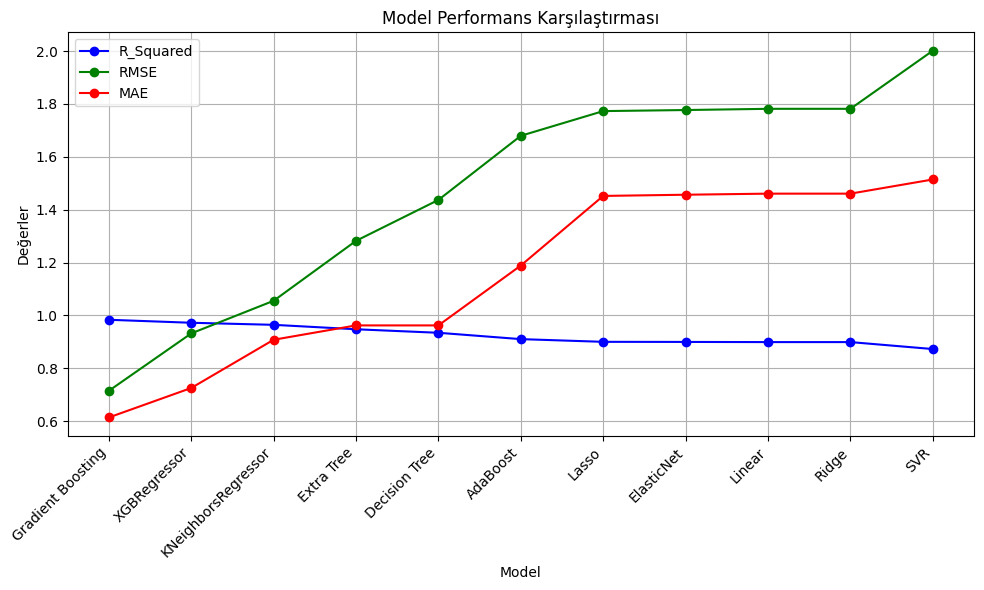

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(results['Model'], results['R_Squared'], marker='o', label='R_Squared', color='blue')
plt.plot(results['Model'], results['RMSE'], marker='o', label='RMSE', color='green')
plt.plot(results['Model'], results['MAE'], marker='o', label='MAE', color='red')
plt.title('Model Performans Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Değerler')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

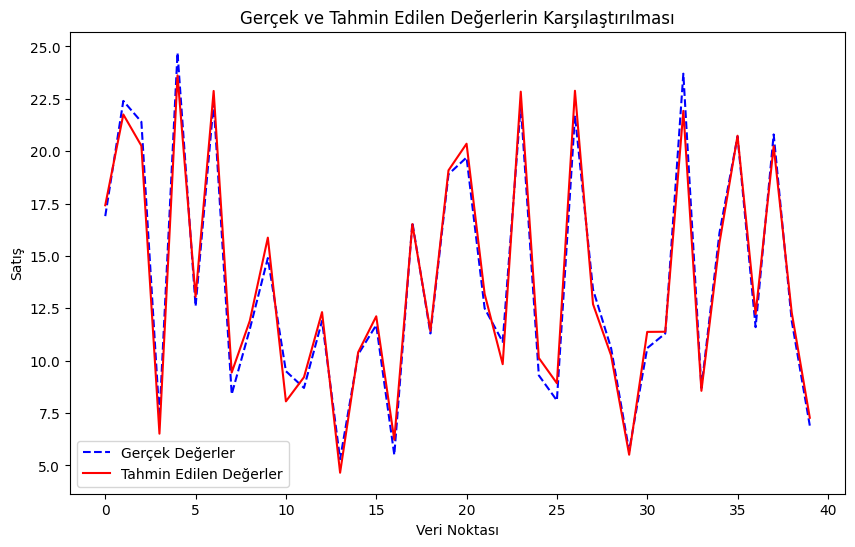

In [43]:
df = pd.DataFrame({'Gerçek Değerler': y_test.values, 'Tahmin Edilen Değerler': best_predictions})
plt.figure(figsize=(10, 6))
plt.plot(df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', linestyle='--')
plt.plot(df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='red')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.xlabel('Veri Noktası')
plt.ylabel('Satış')
plt.legend()
plt.show()